In [4]:
library(ggplot2)

In [1]:
data <- read.table("SIS3.txt" , sep =',', header=TRUE)#names = c("model", "method", "target", "spearman stat", "spearman p_value", "spearman_log10_pval",  "Pearson_stat", "Pearson p_value", "Pearson_log10_pval", "Adj_R2"), sep = ',')
data

model,features,target,spearmanr_stat,spearmanr_pvalue,X.log10.spearmanr_pvalue.,pearsonr_stat,pearsonr_pvalue,X.log10.pearsonr_pvalue.,Adj_r2,acc
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LogisticRegression,sig proteins + Age + Time Since Stroke,[SIS3],0.02161431,0.8443390143,0.07348314,-0.01949239,8.594558e-01,0.06577643,1.151319,0.01176471
LogisticRegression,all proteins +,[SIS3],0.21156636,0.0519282371,1.28459642,0.23682369,2.909308e-02,1.53621028,1.121766,0.08235294
LogisticRegression,all proteins + Time Since Stroke,[SIS3],0.23671851,0.0291667624,1.53511178,0.28472312,8.264841e-03,2.08276550,1.113270,0.10588235
LogisticRegression,all proteins + Age,[SIS3],0.30050237,0.0052001006,2.28398826,0.29668148,5.830991e-03,2.23425762,1.111037,0.07058824
LogisticRegression,all proteins + Age + Time Since Stroke,[SIS3],0.35587912,0.0008299532,3.08094639,0.41408848,8.163175e-05,4.08814092,1.098855,0.08235294


In [2]:
data1 <- data[c(2,3,4,5),c(2,7,9,10,11)]
#data1$names <- c("All protein", "All proteins + Time Since Stroke", "All proteins + Age", "All proteins + Age + Time Since Stroke")
data1$Adj_r2 <- round(data1$Adj_r2 ,digit=2)
data1$pearsonr_stat <- round(data1$pearsonr_stat ,digit=2)
data1$X.log10.pearsonr_pvalue. <- round(data1$X.log10.pearsonr_pvalue. ,digit=2)
data1

,features,pearsonr_stat,X.log10.pearsonr_pvalue.,Adj_r2,acc
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2,all proteins +,0.24,1.54,1.12,0.08235294
3,all proteins + Time Since Stroke,0.28,2.08,1.11,0.10588235
4,all proteins + Age,0.30,2.23,1.11,0.07058824
5,all proteins + Age + Time Since Stroke,0.41,4.09,1.10,0.08235294


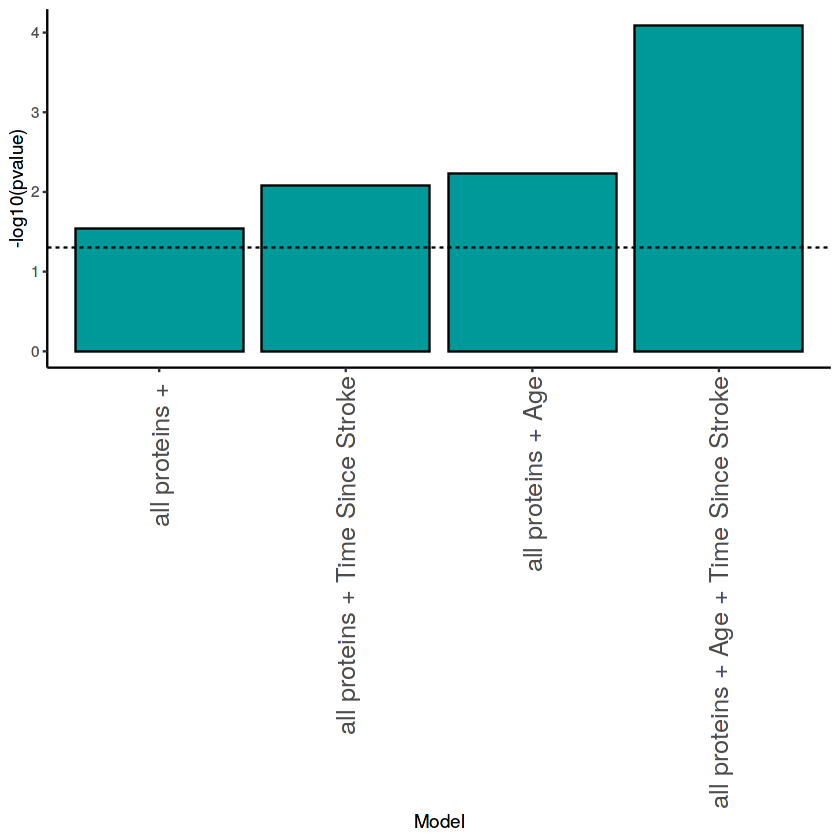

In [5]:
#tiff("Figure2.tiff", units="in", width=10, height=10, res=300)
ggplot(data1, aes(x = reorder(features, X.log10.pearsonr_pvalue.), y = X.log10.pearsonr_pvalue., fill = Pearson_stat)) + 
geom_bar(stat="identity", fill="#009999", colour="black")+ labs(x="Model", y = "-log10(pvalue)")+
   theme_classic()+ theme(axis.text.x = element_text(size = 15, angle = 90, vjust = 0.5, hjust=1)) + geom_hline(yintercept=1.301, linetype="dashed", 
                color = "black", size=0.5) #+ geom_label(aes(label=Pearson_stat),color="black",size=5,vjust= -0.1)
#dev.off()

In [6]:
data2 <- data[c(1,5),c(2,7,9,10,11)]
data2$pearsonr_stat <- round(data2$pearsonr_stat ,digit=2)
data2$X.log10.pearsonr_pvalue. <- round(data2$X.log10.pearsonr_pvalue. ,digit=2)
data2

,features,pearsonr_stat,X.log10.pearsonr_pvalue.,Adj_r2,acc
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,sig proteins + Age + Time Since Stroke,-0.02,0.07,1.151319,0.01176471
5,all proteins + Age + Time Since Stroke,0.41,4.09,1.098855,0.08235294


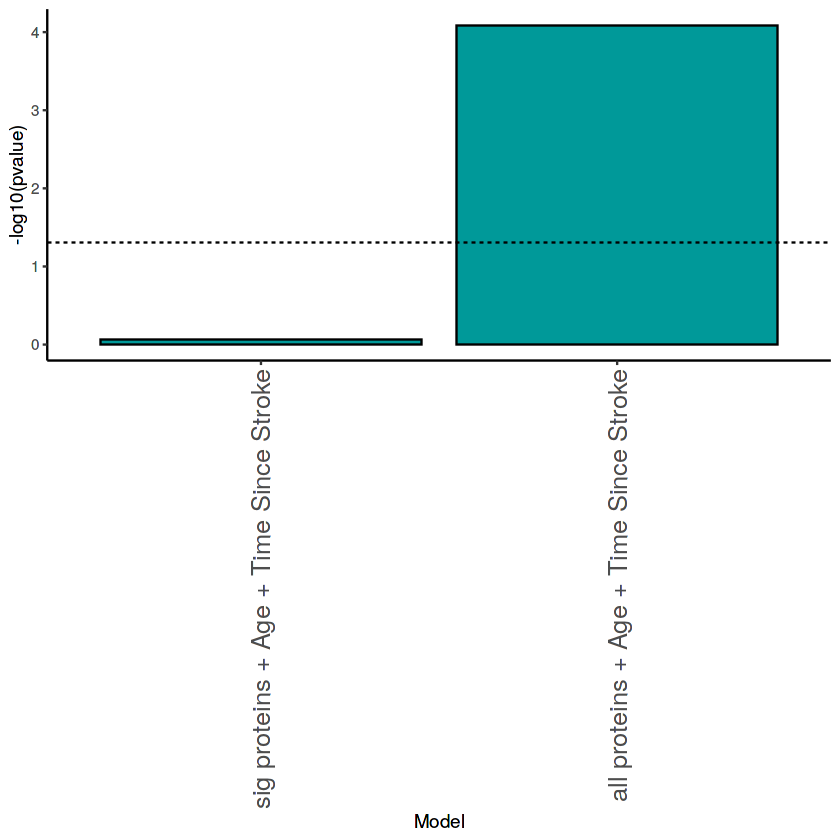

In [7]:
#tiff("Figure3.tiff", units="in", width=10, height=10, res=300)
ggplot(data2, aes(x = reorder(features, X.log10.pearsonr_pvalue.), y = X.log10.pearsonr_pvalue., fill = pearsonr_stat)) + 
geom_bar(stat="identity", fill="#009999", colour="black")+ labs(x="Model", y = "-log10(pvalue)")+
   theme_classic()+ theme(axis.text.x = element_text(size = 15, angle = 90, vjust = 0.5, hjust=1)) + geom_hline(yintercept=1.301, linetype="dashed", 
                color = "black", size=0.5) #+ geom_label(aes(label=Pearson_stat),color="black",size=5,vjust= -0.1)
#dev.off()

 # R Squared

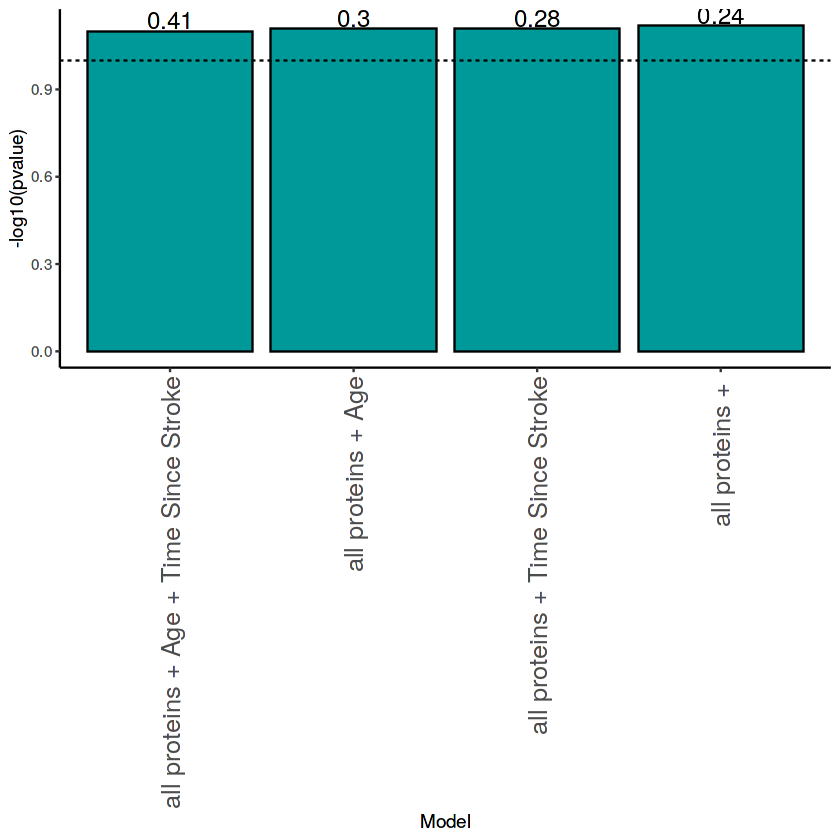

In [14]:
#tiff("Figure2.tiff", units="in", width=10, height=10, res=300)
ggplot(data1, aes(x = reorder(features, Adj_r2), y = Adj_r2, fill = X.log10.pearsonr_pvalue.)) + 
geom_bar(stat="identity", fill="#009999", colour="black")+ labs(x="Model", y = "-log10(pvalue)")+
   theme_classic()+ theme(axis.text.x = element_text(size = 15, angle = 90, vjust = 0.5, hjust=1)) + geom_hline(yintercept=1, linetype="dashed", 
                color = "black", size=0.5) + geom_text(aes(label=pearsonr_stat),color="black",size=5,vjust= -0.1)
#dev.off()

 # Accuracy

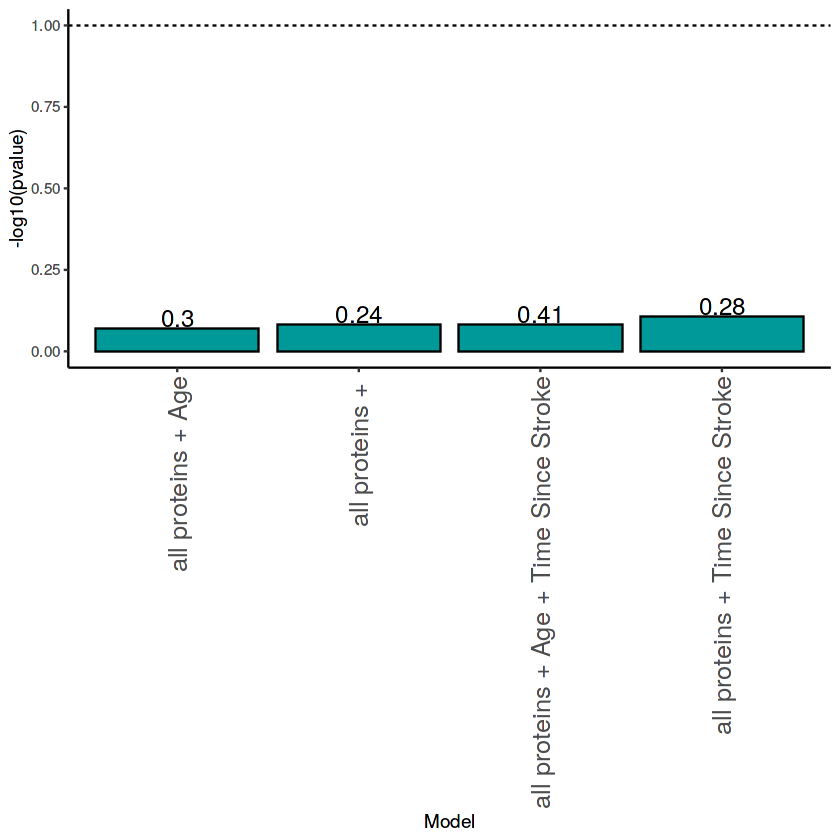

In [15]:
#tiff("Figure2.tiff", units="in", width=10, height=10, res=300)
ggplot(data1, aes(x = reorder(features, acc), y = acc, fill = X.log10.pearsonr_pvalue.)) + 
geom_bar(stat="identity", fill="#009999", colour="black")+ labs(x="Model", y = "-log10(pvalue)")+
   theme_classic()+ theme(axis.text.x = element_text(size = 15, angle = 90, vjust = 0.5, hjust=1)) + geom_hline(yintercept=1, linetype="dashed", 
                color = "black", size=0.5) + geom_text(aes(label=pearsonr_stat),color="black",size=5,vjust= -0.1)
#dev.off()